In [2]:
import pandas as pd
import numpy as np



In [41]:
df=pd.read_csv('/Users/Zihui/Desktop/Stats_Evaluation/mdLog.csv')

In [4]:
df

,updateCount,lastprice,volume,bidsize,bid,ask,asksize
0,1,26.78,303,455,26.77,26.79,1
1,2,26.78,303,455,26.77,26.79,1
2,3,26.77,361,518,26.77,26.78,1
3,4,26.79,374,42,26.78,26.79,44
4,5,26.79,413,163,26.77,26.80,2
...,...,...,...,...,...,...,...
50229,50230,27.09,587297,726,27.08,27.09,185
50230,50231,27.09,587297,726,27.08,27.09,185
50231,50232,27.08,587299,725,27.08,27.09,184
50232,50233,27.09,587305,725,27.08,27.09,179


第一题

In [42]:
## 定义新的一列，叫做 sprd, 为当前时刻的 spread。
## 定义 dif, 为i+1时刻的 spread - i时刻的 spread。由于所有只精确到小数点后两位，dif也只取小数点后两位。

df['sprd'] = df['ask'] - df['bid']
df['dif'] = df['sprd'].diff(periods=1).round(decimals=2)
df['mrktsize'] = (df['asksize']+df['bidsize'])/2

df

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,sprd,dif,mrktsize
0,1,26.78,303,455,26.77,26.79,1,0.02,NaN,228.0
1,2,26.78,303,455,26.77,26.79,1,0.02,0.00,228.0
2,3,26.77,361,518,26.77,26.78,1,0.01,-0.01,259.5
3,4,26.79,374,42,26.78,26.79,44,0.01,-0.00,43.0
4,5,26.79,413,163,26.77,26.80,2,0.03,0.02,82.5
...,...,...,...,...,...,...,...,...,...,...
50229,50230,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5
50230,50231,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5
50231,50232,27.08,587299,725,27.08,27.09,184,0.01,0.00,454.5
50232,50233,27.09,587305,725,27.08,27.09,179,0.01,0.00,452.0


In [25]:
## spread 变宽的次数

n_widen = np.sum(df['dif']>0)
n_widen

233

In [26]:
## spread 变宽是由于两侧都向外移动的情况

n_widen_twosides = np.sum((df['bid'].diff()<0) & (df['ask'].diff()>0))
n_widen_twosides
n_widen_twosides/n_widen

0.004291845493562232

In [27]:
## 单侧的情况

both = (df['dif'] > 0)
aside = (df['bid'].diff() >= 0) & (df['ask'].diff() > 0)
bside = (df['bid'].diff() < 0) & (df['ask'].diff() <= 0)
n_widen_oneside = (both & (aside | bside)).sum()
n_widen_oneside
n_widen_oneside/n_widen

0.9957081545064378

In [28]:
## spread 变窄的次数

n_tighten = (df['dif'] < 0).sum()
n_tighten

235

<AxesSubplot:>

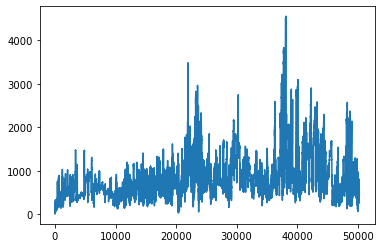

In [29]:
## market size 的分布图

df['mrktsize'].plot()

第二题

In [43]:
df['mp'] = (df['ask']+df['bid'])/2
df

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,sprd,dif,mrktsize,mp
0,1,26.78,303,455,26.77,26.79,1,0.02,NaN,228.0,26.780
1,2,26.78,303,455,26.77,26.79,1,0.02,0.00,228.0,26.780
2,3,26.77,361,518,26.77,26.78,1,0.01,-0.01,259.5,26.775
3,4,26.79,374,42,26.78,26.79,44,0.01,-0.00,43.0,26.785
4,5,26.79,413,163,26.77,26.80,2,0.03,0.02,82.5,26.785
...,...,...,...,...,...,...,...,...,...,...,...
50229,50230,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5,27.085
50230,50231,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5,27.085
50231,50232,27.08,587299,725,27.08,27.09,184,0.01,0.00,454.5,27.085
50232,50233,27.09,587305,725,27.08,27.09,179,0.01,0.00,452.0,27.085


<AxesSubplot:ylabel='Frequency'>

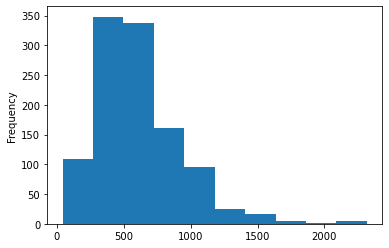

In [44]:
df['mp_dif'] = df['mp'].diff().round(3)
rows = (df['dif'] == 0) & (df['mp_dif'] != 0)
df[rows]['mrktsize'].plot.hist()

第三题：

假设从i时刻到i+1时刻，volume增加量为dv。

如果i+1时刻读取的lastprice比i时刻的midprice要高（低），说明市场方向是向买（卖）移动，这种情况下i时刻的最低价的ask订单被买方主动匹配（最高价的bid买单被卖方主动匹配）。

    * 有可能i时刻的最低价ask订单会全部成交（最高价bid订单全部成交）。比如从updatecount = 3 到 4

    updateCount	lastprice	volume	bidsize	bid	    ask	   asksize
        3	    26.77	    361	    518	    26.77	26.78  1	   
        4	    26.79	    374	    42	    26.78	26.79  44	
    
      市场的最新成交价是26.79，是向买移动。所以在updatecount = 3的一行中，26.78元的ask订单被买方主动成交，对应的asksize是1。但是dv是13，所以剩下的12可以分配到当前的最新成交价，即26.79

    * 也有可能dv就等于asksize（或bidsize）的变化量。


如果i+1时刻读取的lastprice等于i时刻的midprice，可以把dv全部分配到当前lastprice的价位。

这样会导致交易量至多分配在两档价格里，vol_lastprice 和 vol_lastbid (或vol_lastask)

In [ ]:
df['vol_lastbid']
df['vol_lastask']
df['vol_lastprice']

第四题：


In [ ]:
df['sizeDeltaAtBid'] = df['vol_lastbid'] + df['bidsize'].diff()
df['sizeDeltaAtAsk'] = df['vol_lastask'] + df['asksize'].diff()


第五题：

首先找出所有 aggressive side，如果 midprice 往高价移动，则 top order 是第一档的 bid order；反之则是第一档的 ask order。

假如某一个 bid order 是当时的 top order，对应的 bid size 是1000。在第三题中我们给出了一个计算有多少成交量是在last bid的方法, 用这个我们能计算 top order 中成交的数量，比如说有100个。剩下的900个没有被即时成交，在之后有可能会被更高价的 bid order 覆盖，即为非BBO。

In [45]:
df

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,sprd,dif,mrktsize,mp,mp_dif
0,1,26.78,303,455,26.77,26.79,1,0.02,NaN,228.0,26.780,NaN
1,2,26.78,303,455,26.77,26.79,1,0.02,0.00,228.0,26.780,0.000
2,3,26.77,361,518,26.77,26.78,1,0.01,-0.01,259.5,26.775,-0.005
3,4,26.79,374,42,26.78,26.79,44,0.01,-0.00,43.0,26.785,0.010
4,5,26.79,413,163,26.77,26.80,2,0.03,0.02,82.5,26.785,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
50229,50230,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5,27.085,0.000
50230,50231,27.09,587297,726,27.08,27.09,185,0.01,0.00,455.5,27.085,0.000
50231,50232,27.08,587299,725,27.08,27.09,184,0.01,0.00,454.5,27.085,0.000
50232,50233,27.09,587305,725,27.08,27.09,179,0.01,0.00,452.0,27.085,0.000


In [53]:
# if agressive side = bid

# total number of top orders

aggressive_bid = (df['dif'] == 0) & (df['mp_dif'] > 0) 
aggressive_bid.sum()

565

In [ ]:
# number of top orders that don't spend entire lifetime in BBO

notBBO = aggressive_bid & (df['bidsize'].diff(periods=-1) < 0)
np.sum(df[notBBO]['bidsize'] - df[notBBO]['vol_lastbid'])

# number of top orders that are filled at original price

np.sum(df[aggressive_bid]['vol_lastbid'])

In [54]:
# likewise for agressive side = ask

aggressive_ask = (df['dif'] == 0) & (df['mp_dif'] < 0) 
aggressive_ask.sum()

537

第六题：

In [ ]:
df[aggressive_bid]['bidprice'].shift(-40,)